In [1]:
# Install rdkit
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 51.9 MB/s eta 0:00:00


## Ex 1. Read molecules from SMILES

SMILES (Simplified Molecular-Input Line-Entry System) is a popular method for specifying molecules with text string. The RDkit library provides utilities to read molecules from SMILES.


Paracetamol (Acetaminophen) is a commonly used medicine that can help treat pain and reduce a high temperature. It's given by the chemical formula $ C_8H_9N O_2$ and its SMILES is "CC(=O)NC1=CC=C(O)C=C1".


1. Create the paracetamol molecule from its SMILES using the rdkit.Chem.MolFromSmiles class.


2. Visualize its structure (it's sufficient to print the paracetamol molecule or to use rdkit.Chem.Draw.MolToImage())


3. Print out the number of atoms. Did you get 11 ? It should be 20 atoms ? Why ?



4. Print out the list of atoms.


5. Find the number of bonds.



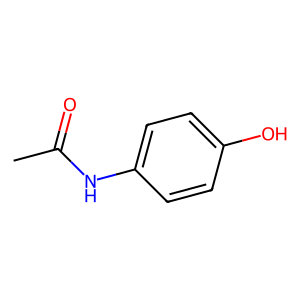

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw

m = Chem.MolFromSmiles('CC(=O)NC1=CC=C(O)C=C1')
img = Draw.MolToImage(m)
img

In [3]:
print("Atoms number : ", len(m.GetAtoms()))

Atoms number :  11


It does not take into account Hydrogen atoms.

In [ ]:
print("Atoms list : ", end="")
for atom in m.GetAtoms():
  print(atom.GetSymbol() + " ", end="")

Atoms list : C C O N C C C C O C C 

In [ ]:
print("Bonds number : ", len(m.GetBonds()))

Bonds number :  11


## Ex 2 Read data from chemical file format

Apart SMILES, .SDF/ .Mol are also the common formats to save molecules. RDKit provides also functionalities to read these files.


Morphine is an opioid agonist used for the relief of moderate to severe acute and chronic pain. The chemical information of this drug can be found at
"https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf".


1. Download this file and save it in a folder.


2. Read the morphine molecule from the file that you've downloaded using "rdkit.Chem.SDMolSupplier"


3. With the help of rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect, compute its fingerprint as a bit vector.

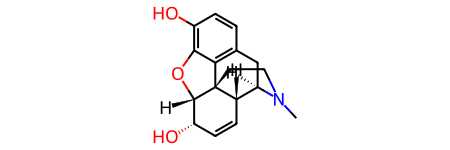

In [5]:
suppl = Chem.SDMolSupplier('DB00295.sdf')
morphine_mol = suppl[0]
morphine_mol

In [6]:
from rdkit.Chem import AllChem

fp_bit_vector = AllChem.GetMorganFingerprintAsBitVect(morphine_mol, 2, nBits=64)
print("Morgan Fingerprint :")
print(fp_bit_vector.ToBitString())

Morgan Fingerprint :
0111100110100111110111101100011001001011111010100100000101011000


## EX3. Fingerprints


A chemical structure can be characterized by a set of numerical values known as molecular fingerprints. They may be 2D Fragment-based fingerprints presented by bit arrays of 0s and 1s wherein each bit position indicates the presence or absence of structural fragments.


The RDKit has a variety of built-in functionality for generating molecular fingerprints and then using them to calculate molecular similarity. In this exercise, we will generate the fingerprints for parcetamol and aspirin that are two popular drugs used for pains.



1. Compute the fingerprint of the paracetamol as bit vector by using the rdkit.AllChem.GetMorganFingerprintAsBitVectCompute Class. Convert it to a numpy vector. Known that Paracetamol's SMILES is ""CC(=O)OC1=CC=CC=C1C(O)=O". Choose the number of bits nBits= 1024. Find the elements that are nonzero of the vector.

2. Do the same thing for the aspirin. Aspirin's SMILES is "CC(=O)NC1=CC=C(O)C=C1".



3. Using rdkit.DataStructs.DiceSimilarity(), compute the DiceSimilarity between the fingerprints of the paracetamol and the aspirin.

In [7]:
import numpy as np

paracetamol = Chem.MolFromSmiles('CC(=O)OC1=CC=CC=C1C(O)=O')
paracetamol_fp = AllChem.GetMorganFingerprintAsBitVect(paracetamol, 2, nBits=1024)
paracetamol_vector = np.array(paracetamol_fp)
print("Paracetamol Fingerprint :")
print(paracetamol_vector)

Paracetamol Fingerprint :
[0 0 0 ... 0 0 0]


In [8]:
aspirin = Chem.MolFromSmiles('CC(=O)NC1=CC=C(O)C=C1')
aspirin_fp = AllChem.GetMorganFingerprintAsBitVect(aspirin, 2, nBits=1024)
aspirin_vector = np.array(aspirin_fp)
print("Aspirin Fingerprint :")
print(aspirin_vector)

Aspirin Fingerprint :
[0 0 0 ... 0 0 0]


In [9]:
print("Non zero index Paracetamol : ", np.nonzero(paracetamol_vector)[0])
print("Non zero index Aspirin : ", np.nonzero(aspirin_vector)[0])
print("Non zero count Paracetamol : ", len(np.nonzero(paracetamol_vector)[0]))
print("Non zero count Aspirin : ", len(np.nonzero(aspirin_vector)[0]))

Non zero index Paracetamol :  [  11   23   33   64  175  356  386  389  423  444  456  592  650  695
  705  726  751  807  849  893  909  946  967 1017]
Non zero index Aspirin :  [  33   53  128  191  245  289  356  530  578  650  726  745  754  792
  807  843  849  893 1017]
Non zero count Paracetamol :  24
Non zero count Aspirin :  19


In [10]:
from rdkit.DataStructs import DiceSimilarity

similarity = DiceSimilarity(paracetamol_fp, aspirin_fp)
print("Similarity :", similarity)

Similarity : 0.37209302325581395


## EX 4: Descriptors

Molecules are also described by a set of physiochemical descriptors. They should be the log partition coefficient, the polar surface area ... that describe the molecule's structure.


RDKit provides utilities that allow us to compute descriptor of molecules.
Using the rdkit.ML.Descriptors.MoleculeDescriptors.MolecularDescriptorCalculator class, compute the descriptor for paracetamol molecule from SMILES string. Note that SMILES string for paracetamol is "CC(=O)NC1=CC=C(O)C=C1"



In [11]:
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

paracetamol = Chem.MolFromSmiles('CC(=O)OC1=CC=CC=C1C(O)=O')

descriptor_names = [x[0] for x in Chem.Descriptors.descList]

#metrics
calculator = MolecularDescriptorCalculator(descriptor_names)

#values
descriptors = calculator.CalcDescriptors(paracetamol)

descriptor_values = zip(descriptor_names, descriptors)

for name, value in descriptor_values:
    print(f"{name}: {value}")

MaxEStateIndex: 10.611948223733938
MinEStateIndex: -1.1140277777777776
MaxAbsEStateIndex: 10.611948223733938
MinAbsEStateIndex: 0.01601851851851821
qed: 0.5501217966938848
MolWt: 180.15899999999996
HeavyAtomMolWt: 172.09499999999997
ExactMolWt: 180.042258736
NumValenceElectrons: 68
NumRadicalElectrons: 0
MaxPartialCharge: 0.33900378687731025
MinPartialCharge: -0.4775395271554559
MaxAbsPartialCharge: 0.4775395271554559
MinAbsPartialCharge: 0.33900378687731025
FpDensityMorgan1: 1.3076923076923077
FpDensityMorgan2: 1.9230769230769231
FpDensityMorgan3: 2.4615384615384617
BCUT2D_MWHI: 16.536111221254316
BCUT2D_MWLOW: 10.182282381035344
BCUT2D_CHGHI: 2.1043069809578547
BCUT2D_CHGLO: -2.0311320919470144
BCUT2D_LOGPHI: 2.1698345568128037
BCUT2D_LOGPLOW: -2.0630000619642956
BCUT2D_MRHI: 5.913065796110139
BCUT2D_MRLOW: -0.13141434244030778
BalabanJ: 3.0435273546341013
BertzCT: 343.2228677267164
Chi0: 9.844934982691242
Chi0n: 6.9813595436500515
Chi0v: 6.9813595436500515
Chi1: 6.109060905280622
Ch

## Ex5: SMART

In many commonly used applications, we need to determine whether atoms in a molecule match a particular pattern. It can be used for filtering structures or identifying substructures that are associated with toxicological problem.

SMART us an extension of the SMILES language that can be used to create queries.

1. Find molecules in the following list named "smiles_list" that contain the "CCC" pattern (you can use the GetSubstructMatch class).


2. Highlight the pattern "CCC" in these molecules.


3. Do the same thing ex 1 but for the pattern "C(=O)N".

Match CCC :


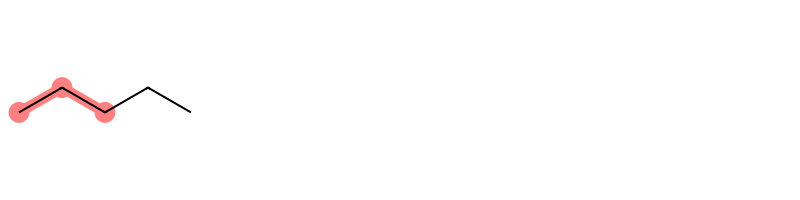

In [12]:
smiles_list = ["CCCCC","CCOCC","CCNCC","CC(=O)NC1=CC=C(O)C=C1", "CC(=O)NC1=CC=C(O[13CH3])C=C1", "CN(C(=O)C(Cl)Cl)C1=CC=C(O)C=C1"]

molecules = [Chem.MolFromSmiles(s) for s in smiles_list]

pattern = Chem.MolFromSmarts("CCC")
match_molecules = []

for mol in molecules:
  if mol.HasSubstructMatch(pattern):
    match_molecules.append(mol)

print("Match CCC :")
Draw.MolsToGridImage(match_molecules, molsPerRow=4, subImgSize=(200,200),
                               highlightAtomLists=[mol.GetSubstructMatch(pattern) for mol in match_molecules])


Match C(=O)N :


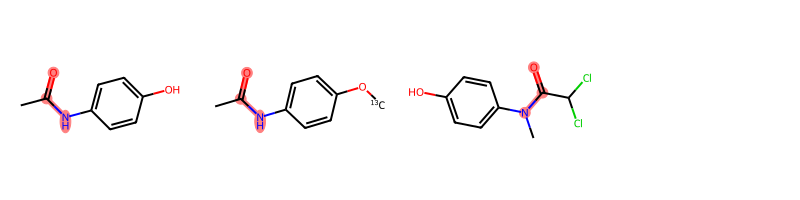

In [13]:
smiles_list = ["CCCCC","CCOCC","CCNCC","CC(=O)NC1=CC=C(O)C=C1", "CC(=O)NC1=CC=C(O[13CH3])C=C1", "CN(C(=O)C(Cl)Cl)C1=CC=C(O)C=C1"]

molecules = [Chem.MolFromSmiles(s) for s in smiles_list]

pattern = Chem.MolFromSmarts("C(=O)N")
match_molecules = []

for mol in molecules:
  if mol.HasSubstructMatch(pattern):
    match_molecules.append(mol)

print("Match C(=O)N :")
Draw.MolsToGridImage(match_molecules, molsPerRow=4, subImgSize=(200,200),
                               highlightAtomLists=[mol.GetSubstructMatch(pattern) for mol in match_molecules])


## Ex6: Machine learning with RDkit - Predict solubility

In this exercise, we will use machine learning to predict solubility of molecules. For this purpose, we will borrow a dataset from rdkit that is originated from the Huuskonen dataset. We will try to predict Aqueous Solubility for molecules that is known as "logS".


This exercise is divided into 3 parts: Preparing a dataset, training a model and preparing dataset for prediction and applying a predictive model.



## EX6.I Preparing dataset

Preparing dataset requires a few steps:


1. Download file from "https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf".


2. With the help of rdkit.Chem.SDMolSupplier, get list of molecules contained in this file. You should call this list as **molecule_list**. The option **removeHs=False** should be chosen.


3. Write a function named **calculate_descriptors(mol)** that allows us to calculate descriptors of a molecule. This function takes a Rdkit molecule as input and returns an array vector of descriptors.


4. Apply the function **caluclate_descriptors** to the list of molecules **molecule_list** and store the result in a dataframe named **df**. Look at few rows of **df** to see whether the descriptors are calculated.


5. For each molecule from this dataset, we can get the aqueous solubility (logS) via attribute **getProp('SOL')**. Create a list that contains the aqueous solubility of all molecules from the **molecule_list** list. You should call this list by **labels**. Remember to convert these values to float format.


6. Plot the histogram of the "labels" list to see the distribution of the solubility of molecules. Do you have some comments about the aqueous solubility of molecules ?



In [14]:
!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf

--2023-09-25 12:00:34--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1376487 (1.3M) [text/plain]
Saving to: ‘solubility.train.sdf’

solubility.train.sd 100%[===================>]   1.31M  --.-KB/s    in 0.04s   

2023-09-25 12:00:34 (30.9 MB/s) - ‘solubility.train.sdf’ saved [1376487/1376487]



In [15]:
from rdkit import Chem

molecule_list = Chem.SDMolSupplier("solubility.train.sdf", removeHs=False)

print("Nb mols :", len(molecule_list))

Nb mols : 1025


In [16]:
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

def calculate_descriptors(mol):
    descriptor_names = [x[0] for x in Chem.Descriptors.descList]
    calculator = MolecularDescriptorCalculator(descriptor_names)
    descriptors = calculator.CalcDescriptors(mol)
    return list(descriptors)

In [17]:
import pandas as pd

data = []

for mol in molecule_list:
  row = calculate_descriptors(mol)
  data.append(row)

descriptor_names = [x[0] for x in Chem.Descriptors.descList]

df = pd.DataFrame(data, columns=descriptor_names)

In [18]:
df.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,2.211806,1.343750,2.211806,1.343750,0.468786,72.151,60.055,72.09390,32,0,...,0,0,0,0,0,0,0,0,0,0
1,1.500000,1.500000,1.500000,1.500000,0.408362,70.135,60.055,70.07825,30,0,...,0,0,0,0,0,0,0,0,0,0
2,2.231806,1.355000,2.231806,1.355000,0.462954,86.178,72.066,86.10955,38,0,...,0,0,0,0,0,0,0,0,1,0
3,2.253472,0.898148,2.253472,0.898148,0.483890,86.178,72.066,86.10955,38,0,...,0,0,0,0,0,0,0,0,0,0
4,2.243056,0.541667,2.243056,0.541667,0.424482,86.178,72.066,86.10955,38,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
labels = []

for mol in molecule_list:
  logS = mol.GetProp('SOL')
  labels.append(float(logS))

print(labels)

[-3.18, -2.64, -3.84, -3.74, -3.55, -3.1, -3.3, -4.53, -3.85, -5.24, -3.52, -4.15, -2.54, -2.1, -3.23, -3.24, -3.82, -3.27, -4.44, -5.05, -2.68, -2.03, -1.87, -1.97, -4.0, -1.64, -2.36, -3.01, -4.24, -1.64, -2.21, -2.8, -2.77, -2.82, -3.37, -3.31, -3.2, -3.21, -3.11, -3.27, -4.06, -3.75, -3.77, -3.66, -3.89, -4.0, -4.64, -4.15, -2.82, -4.31, -4.17, -4.91, -5.22, -3.6, -3.77, -3.7, -4.29, -4.74, -4.72, -3.96, -4.14, -4.89, -4.63, -4.92, -5.26, -5.89, -6.96, -6.19, -6.0, -5.96, -6.68, -8.04, -6.74, -8.19, -7.02, -7.8, -8.8, -9.03, -4.97, -4.38, -7.42, -5.17, -6.89, -8.23, -8.0, -8.49, -8.66, -1.0, -0.63, -0.89, -1.17, -1.54, -1.9, -1.91, -3.14, -1.09, -1.6, -1.29, -1.32, -1.68, -2.0, -1.48, -2.18, -2.6, -3.04, -3.67, -1.41, -1.73, -1.59, -2.29, -1.62, -1.6, -1.85, -2.08, -2.38, -1.92, -2.03, -1.96, -2.96, -2.0, -2.43, -2.4, -2.73, -2.63, -2.63, -2.51, -2.69, -3.12, -3.07, -3.81, -2.3, -1.71, -3.12, -4.59, -3.99, -4.81, -1.64, -1.3, -3.22, -1.96, -2.54, -1.36, -6.29, -7.33, -6.18, -1.5, -

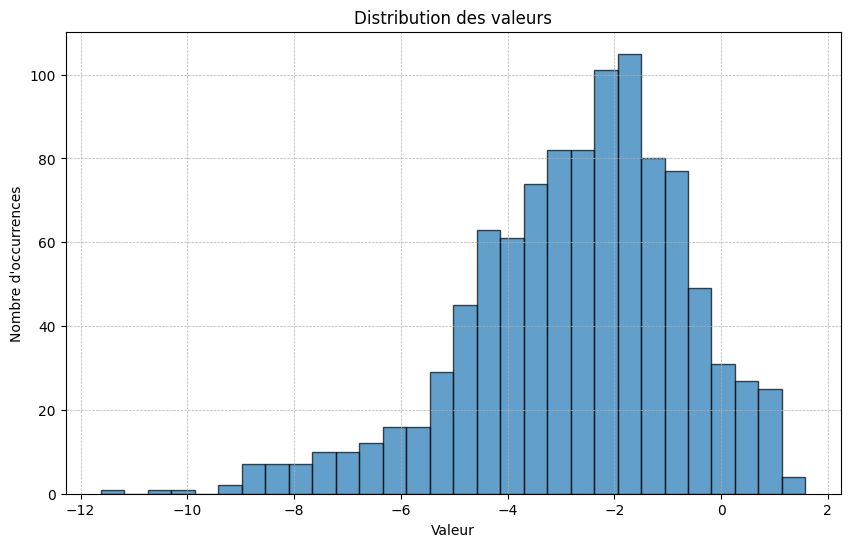

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(labels, bins=30, edgecolor='k', alpha=0.7)
plt.title("Distribution des valeurs")
plt.xlabel("Valeur")
plt.ylabel("Nombre d'occurrences")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

On peut voir que les valeurs sont concentrées autour de -2.

## Ex6.II Feature Engineering and Training a model of regression.

Now, we have the **df** dataframe that contains the descriptors for molecules and the **labels** list that contains the solvant property of molecules.

1. Check the dataframe **df** to see whether it contains NaN values. How many row contained NaN values are there in the dataframe **df** ? Remove these rows from  **df** and **labels**.


2. Apply the MinMaxScaler to the dataframe **df** to normalize the data.


3. Construct and train a regression model.


4. Calculate the square root error for the dataset

In [21]:
indices_with_nan = df[df.isnull().any(axis=1)].index

df = df.dropna()

labels = [label for index, label in enumerate(labels) if index not in indices_with_nan]

assert(df.isna().sum().sum() == 0)
assert(len(df) == len(labels))

In [22]:
print(len(labels))
print(len(df))

1024
1024


In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled_array = scaler.fit_transform(df)

df = pd.DataFrame(df_scaled_array, columns=df.columns)

df.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.045160,0.913346,0.045160,0.354103,0.401233,0.042084,0.033447,0.042052,0.072581,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.933978,0.000000,0.395291,0.323502,0.038831,0.033447,0.038797,0.064516,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.046428,0.914831,0.046428,0.357068,0.393731,0.064721,0.053504,0.064685,0.096774,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0
3,0.047803,0.854507,0.047803,0.236639,0.420664,0.064721,0.053504,0.064685,0.096774,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.047142,0.807435,0.047142,0.142668,0.344239,0.064721,0.053504,0.064685,0.096774,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [24]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_dim=208, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               26752     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 35073 (137.00 KB)
Trainable params: 35073 (137.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(df.values, np.array(labels), epochs=15)

Epoch 1/15
32/32 [==============================] - 1s 2ms/step - loss: 4.1948
Epoch 2/15
32/32 [==============================] - 0s 2ms/step - loss: 1.1075
Epoch 3/15
32/32 [==============================] - 0s 2ms/step - loss: 0.5853
Epoch 4/15
32/32 [==============================] - 0s 2ms/step - loss: 0.4685
Epoch 5/15
32/32 [==============================] - 0s 2ms/step - loss: 0.4214
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 0.3785
Epoch 7/15
32/32 [==============================] - 0s 2ms/step - loss: 0.3291
Epoch 8/15
32/32 [==============================] - 0s 2ms/step - loss: 0.3028
Epoch 9/15
32/32 [==============================] - 0s 2ms/step - loss: 0.2937
Epoch 10/15
32/32 [==============================] - 0s 2ms/step - loss: 0.2956
Epoch 11/15
32/32 [==============================] - 0s 2ms/step - loss: 0.2634
Epoch 12/15
32/32 [==============================] - 0s 2ms/step - loss: 0.2502
Epoch 13/15
32/32 [==============================

## Ex6.III Prepare data for test  and test model


1. Download file from "https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf".

2. Read molecules from this file and store them in a list named **list_molecule_test**.


3. Take a molecule from the **list_molecule_test** and then calculate its descriptions thank to the **calculate_descriptors(mol)** function that you've coded above.


4. Apply **minmaxscaler** to these descriptors. Note that **minmaxscaler**  is one that you've created at Ex6.II.


5. Use the model that you've trained to predict the aqueous solubility (logS) of the molecule. Compare to the real logS value of the molecule.

6. (Optional) Calculate the mean square root error of the model for this dataset.



Note: If there exists problem of reading the file solubility.test.sdf as
"RDKit ERROR: [09:28:36] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [09:32:48] ERROR: Counts line too short: '' on line4"
so, go to the url, click "raw" and save this file by hand. The error will be gone away


In [26]:
# 1. Download the file
!wget https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf

--2023-09-25 12:02:09--  https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 327929 (320K) [text/plain]
Saving to: ‘solubility.test.sdf’

solubility.test.sdf 100%[===================>] 320.24K  1.03MB/s    in 0.3s    

2023-09-25 12:02:10 (1.03 MB/s) - ‘solubility.test.sdf’ saved [327929/327929]



In [28]:
list_molecule_test = Chem.SDMolSupplier("test.sdf", removeHs=False)

data = []

for mol in list_molecule_test:
  row = calculate_descriptors(mol)
  data.append(row)

descriptor_names = [x[0] for x in Chem.Descriptors.descList]

df_test = pd.DataFrame(data, columns=descriptor_names)

labels_test = []

for mol in list_molecule_test:
  logS = mol.GetProp('SOL')
  labels_test.append(float(logS))

indices_with_nan = df_test[df_test.isnull().any(axis=1)].index

df_test = df_test.dropna()

labels_test = [label for index, label in enumerate(labels_test) if index not in indices_with_nan]

assert(df_test.isna().sum().sum() == 0)
assert(len(df_test) == len(labels_test))

scaler = MinMaxScaler()

df_scaled_array = scaler.fit_transform(df_test)

df_test = pd.DataFrame(df_scaled_array, columns=df_test.columns)

df_test.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.013228,0.882711,0.013228,0.540830,0.446847,0.045926,0.031109,0.046039,0.084112,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.012283,0.873820,0.012283,0.506024,0.466478,0.072722,0.054496,0.072824,0.112150,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.099802,0.914854,0.099802,0.666667,0.388661,0.015279,0.007722,0.015402,0.046729,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.012519,0.939475,0.012519,0.763052,0.336737,0.038224,0.031109,0.038335,0.065421,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.094955,0.879976,0.094955,0.530120,0.384696,0.011428,0.007722,0.011550,0.037383,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
y_pred = model.predict(df_test.values)

9/9 [==============================] - 0s 2ms/step


In [30]:
y_pred = [pred[0] for pred in y_pred]

In [31]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(labels_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Square Error: {rmse}")

Root Mean Square Error: 0.8381569882209962
